In [1]:
import sys

lib_dir = "/home/daniele/documents/github/ftt01/phd/share/lib"
sys.path.insert(0, lib_dir)

In [2]:
from lib import *

In [3]:
wdir = "/home/daniele/documents/github/ftt01/phd/projects/era5_evaluation/"
current = DataCollector(configPath=wdir + "etc/conf/")

In [4]:
def qqplot(
    obs_data, model_data, output_file,
    obs_label="Metered streamflow $[m^3/s]$", model_label="Model streamflow $[m^3/s]$",
    width=90, height=90, output_format=output_format, bbox_inches='tight', facecolor='w', dpi=600):

    if obs_data.shape[0] == model_data.shape[0]:

        df_data = pd.concat([model_data,obs_data], axis=1)
        df_data.dropna(inplace=True)

        model_data_values = list(df_data.iloc[:,0].values)
        obs_data_values = list(df_data.iloc[:,1].values)

        value_max = max(model_data_values)
        if max(obs_data_values) > max(model_data_values):
            value_max = max(model_data_values)
            max_series = obs_data_values
        else:
            max_series = model_data_values

        fig, axs = instantiatePlot( model_label,obs_label, width=width, height=height )

        axs.scatter( obs_data_values, model_data_values, s=10 ) 

        axs.set_xlim([0,value_max])
        axs.set_ylim([0,value_max])

        z1 = np.polyfit( obs_data_values, model_data_values, 1 )
        p1 = np.poly1d(z1)

        # cc_p  =  np.corrcoef(obs_data_values, model_data_values)
        # logging.info( "KR1x1 correlation: " + str(cc_p[0][1]) )
        axs.plot( max_series, max_series, "r--" )

        fig.savefig( 
            output_file, output_format=output_format,
            bbox_inches=bbox_inches, facecolor=facecolor, dpi=dpi )
    else:
        print("Error: timeseries must be equal shape")

In [5]:
### simulation selection #############################################################################

kriging_data_calibration = DataCollector(configPath=wdir + "etc/conf/")

current_phase = "calibration_best_plan"
current_basin = "passirio"
current_type = "kriging"
current_node = "merano"

kriging_data_calibration.retrieveData(current_phase, current_basin, current_type, current_node)

### end simulation selection ##########################################################################
### simulation selection #############################################################################

kriging_data_validation = DataCollector(configPath=wdir + "etc/conf/")

current_phase = "validation_best_plan"
current_basin = "passirio"
current_type = "kriging"
current_node = "merano"

kriging_data_validation.retrieveData(current_phase, current_basin, current_type, current_node)

### end simulation selection ##########################################################################
kriging_data = pd.concat( [kriging_data_calibration.model_flow, kriging_data_validation.model_flow] )

# take the obs from the object
obs_data = pd.concat( [kriging_data_calibration.obs_flow, kriging_data_validation.obs_flow] )

In [6]:
### simulation selection #############################################################################

kriging_11_data_calibration = DataCollector(configPath=wdir + "etc/conf/")

current_phase = "calibration_best_plan"
current_basin = "passirio"
current_type = "kriging_11"
current_node = "merano"

kriging_11_data_calibration.retrieveData(current_phase, current_basin, current_type, current_node)

### end simulation selection ##########################################################################
### simulation selection #############################################################################

kriging_11_data_validation = DataCollector(configPath=wdir + "etc/conf/")

current_phase = "validation_best_plan"
current_basin = "passirio"
current_type = "kriging_11"
current_node = "merano"

kriging_11_data_validation.retrieveData(current_phase, current_basin, current_type, current_node)

### end simulation selection ##########################################################################
kriging_11_data = pd.concat( [kriging_11_data_calibration.model_flow, kriging_11_data_validation.model_flow] )

In [7]:
### simulation selection #############################################################################

rea_data_calibration = DataCollector(configPath=wdir + "etc/conf/")

current_phase = "calibration_best_plan"
current_basin = "passirio"
current_type = "reanalysis"
current_node = "merano"

rea_data_calibration.retrieveData(current_phase, current_basin, current_type, current_node)

### end simulation selection ##########################################################################
### simulation selection #############################################################################

rea_data_validation = DataCollector(configPath=wdir + "etc/conf/")

current_phase = "validation_best_plan"
current_basin = "passirio"
current_type = "reanalysis"
current_node = "merano"

rea_data_validation.retrieveData(current_phase, current_basin, current_type, current_node)

### end simulation selection ##########################################################################
rea_data = pd.concat( [rea_data_calibration.model_flow, rea_data_validation.model_flow] )

In [8]:
x_label = "Metered streamflow $[m^3/s]$"
y_label = "Modeled streamflow $[m^3/s]$"
xscale="linear"
yscale="linear"
width=190
height=190
scale_factor=0.4
tick_size=10
label_size=10
legend_fontsize=8
ratio_width=190
ratio=3740/500
my_dpi=600
bbox_inches='tight'
facecolor='w'

/tmp/ipykernel_851503/2985759448.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "output_format" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(


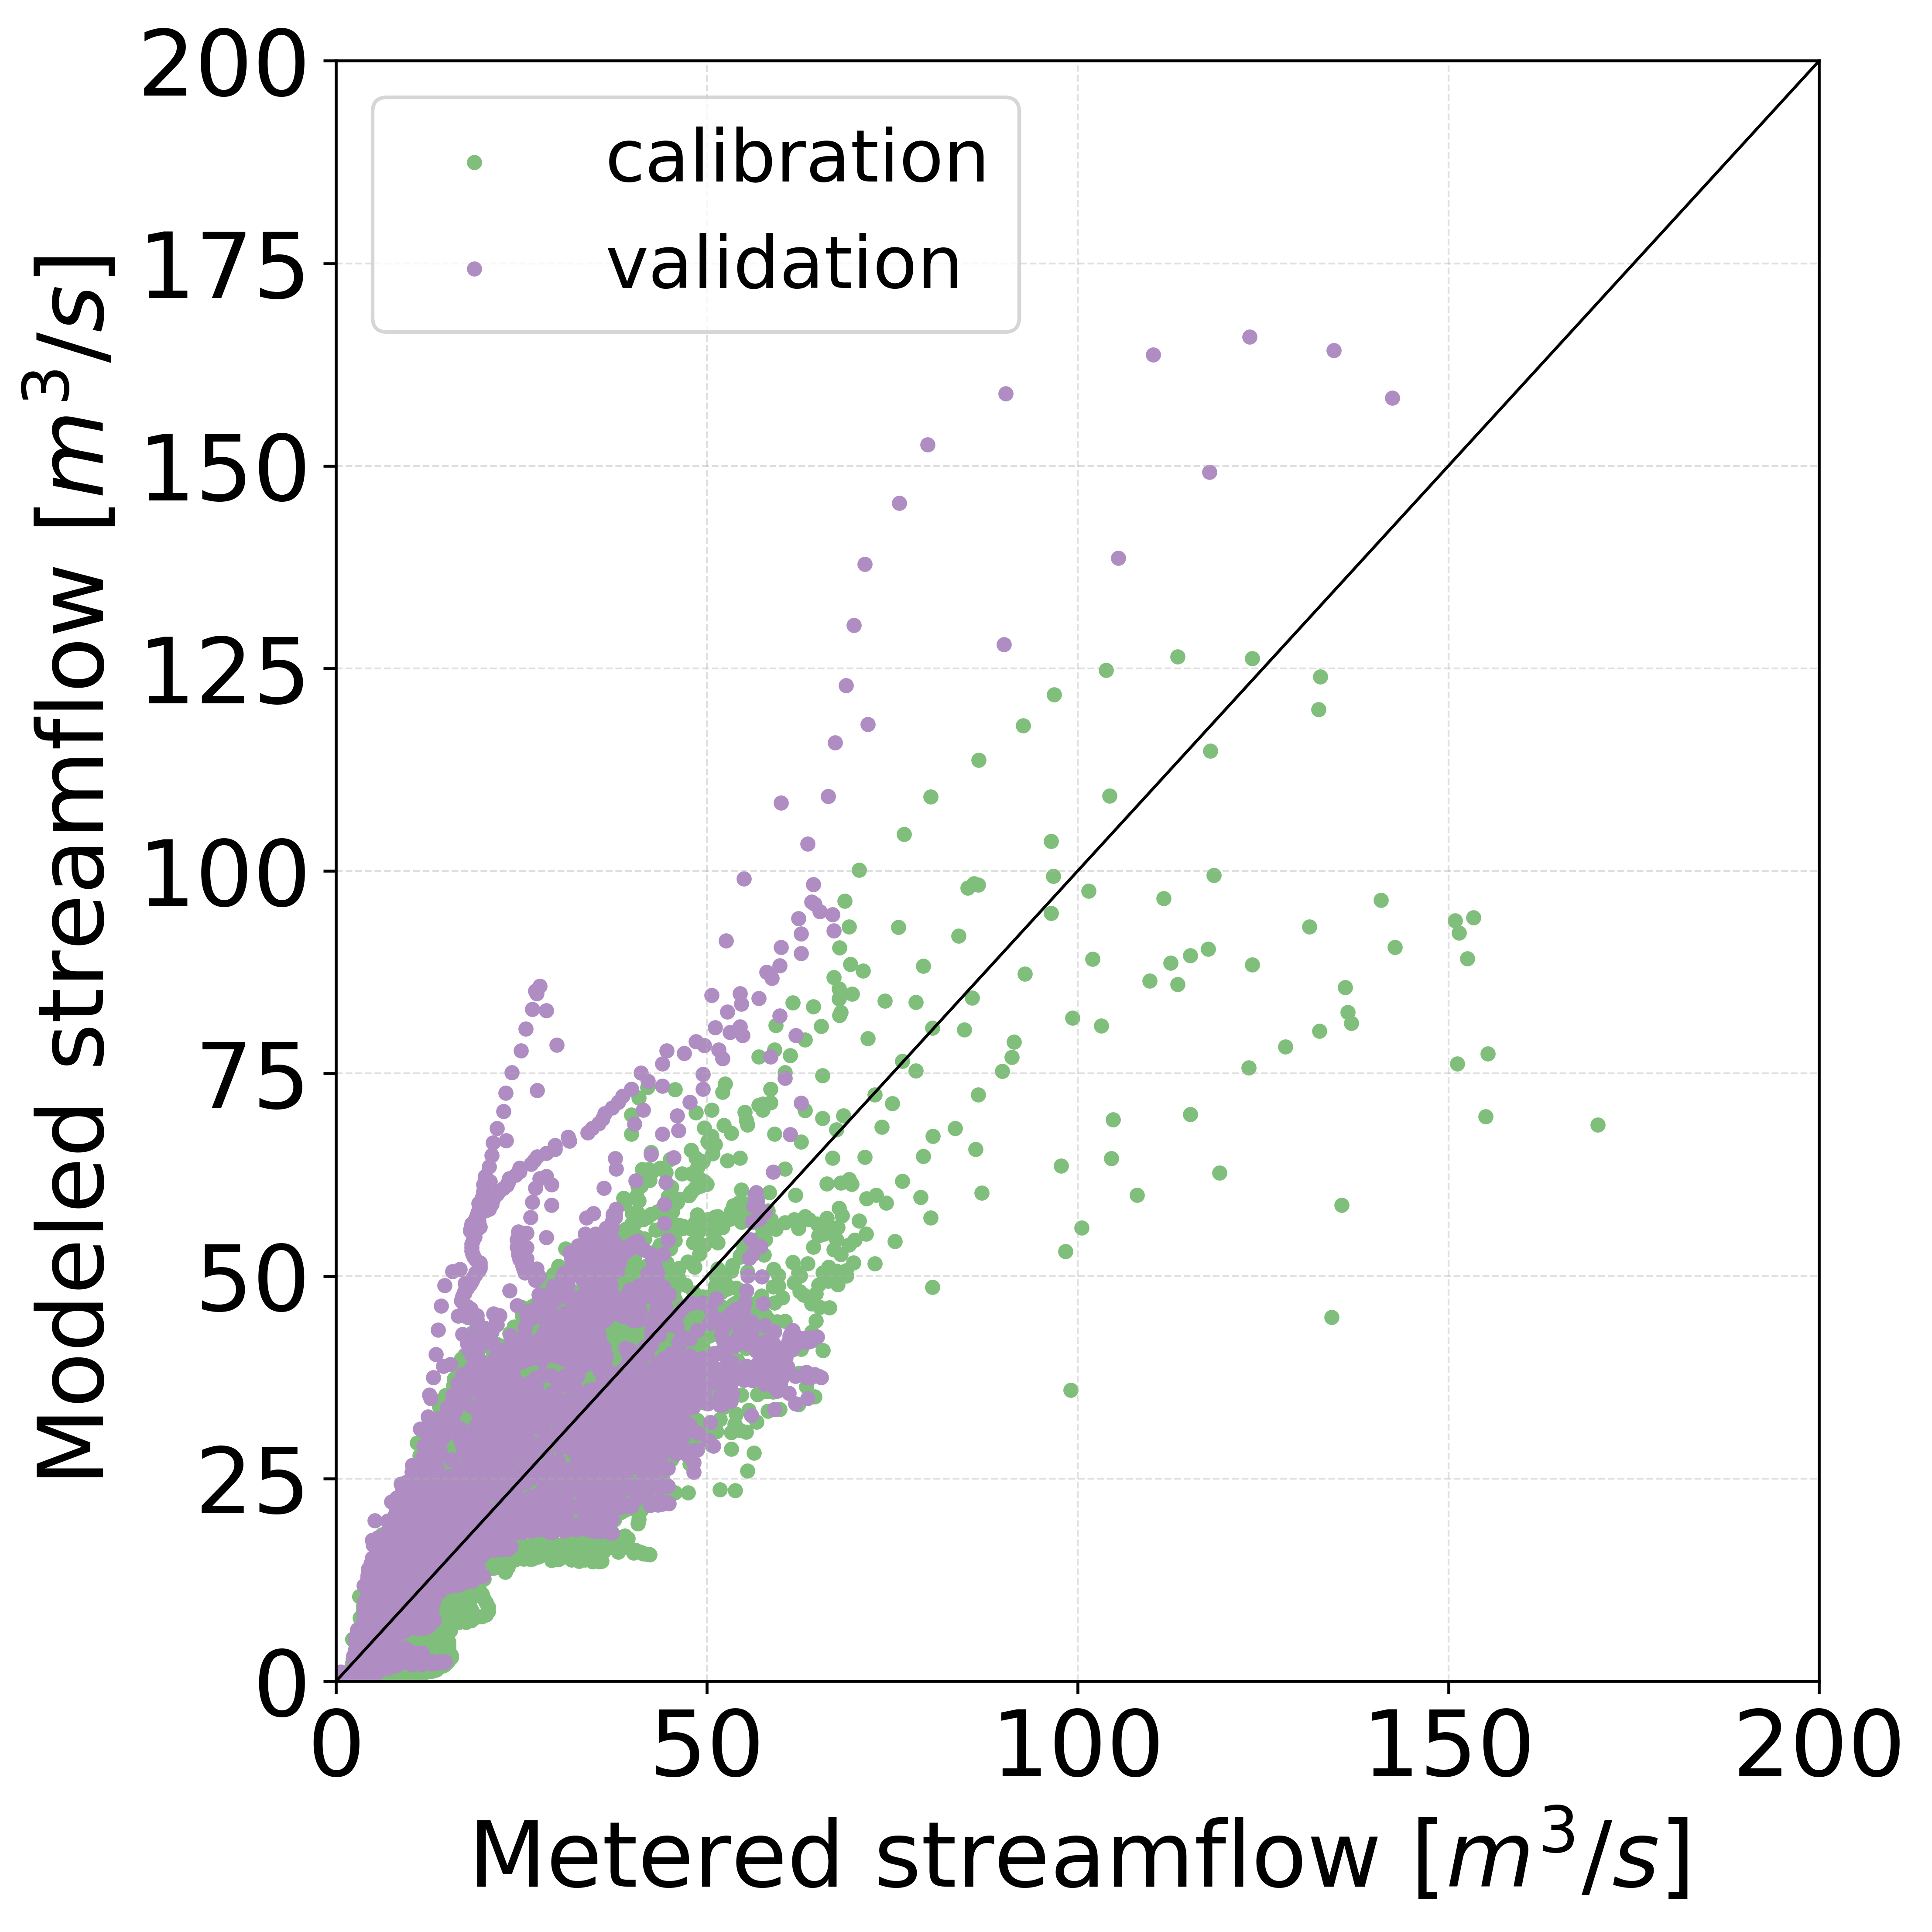

In [9]:
output_file = current.config["output_path"] + "model/streamflow/passirio/hourly/plan_plan/" + "model_streamflow_passirio_plan_hourly_qq_KR1x1.".format(current_type=current_type) + output_format

df_data_cal = pd.concat([kriging_data_calibration.model_flow,kriging_data_calibration.obs_flow], axis=1)
df_data_cal.dropna(inplace=True)
df_data_val = pd.concat([kriging_data_validation.model_flow,kriging_data_validation.obs_flow], axis=1)
df_data_val.dropna(inplace=True)

model_data_values_cal = list(df_data_cal.iloc[:,0].values)
obs_data_values_cal = list(df_data_cal.iloc[:,1].values)

model_data_values_val = list(df_data_val.iloc[:,0].values)
obs_data_values_val = list(df_data_val.iloc[:,1].values)

##############
plot_x_inches = ratio / ratio_width * width
plot_y_inches = ratio / ratio_width * height

fig, axs = plt.subplots(1,
                        figsize=[plot_x_inches, plot_y_inches],
                        tight_layout={'pad': 0},
                        dpi=my_dpi
                        )

axs.tick_params(labelsize=tick_size/scale_factor)

axs.set_xscale(xscale)
axs.set_yscale(yscale)

axs.set_ylabel(y_label, fontsize=label_size/scale_factor)
axs.set_xlabel(x_label, fontsize=label_size/scale_factor)
####################

axs.scatter( obs_data_values_cal, model_data_values_cal, s=10, c='#7fbf7b')
axs.scatter( obs_data_values_val, model_data_values_val, s=10, c='#af8dc3')

axs.set_xlim([0,200])
axs.set_ylim([0,200])

axs.legend(["calibration","validation"],fontsize=legend_fontsize/scale_factor, bbox_to_anchor=None, loc='upper left')

axs.axline([0,0],[1,1],c='k')

fig.savefig( 
    output_file, output_format=output_format,
    bbox_inches=bbox_inches, facecolor=facecolor, dpi=my_dpi )

/tmp/ipykernel_851503/4020072106.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "output_format" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(


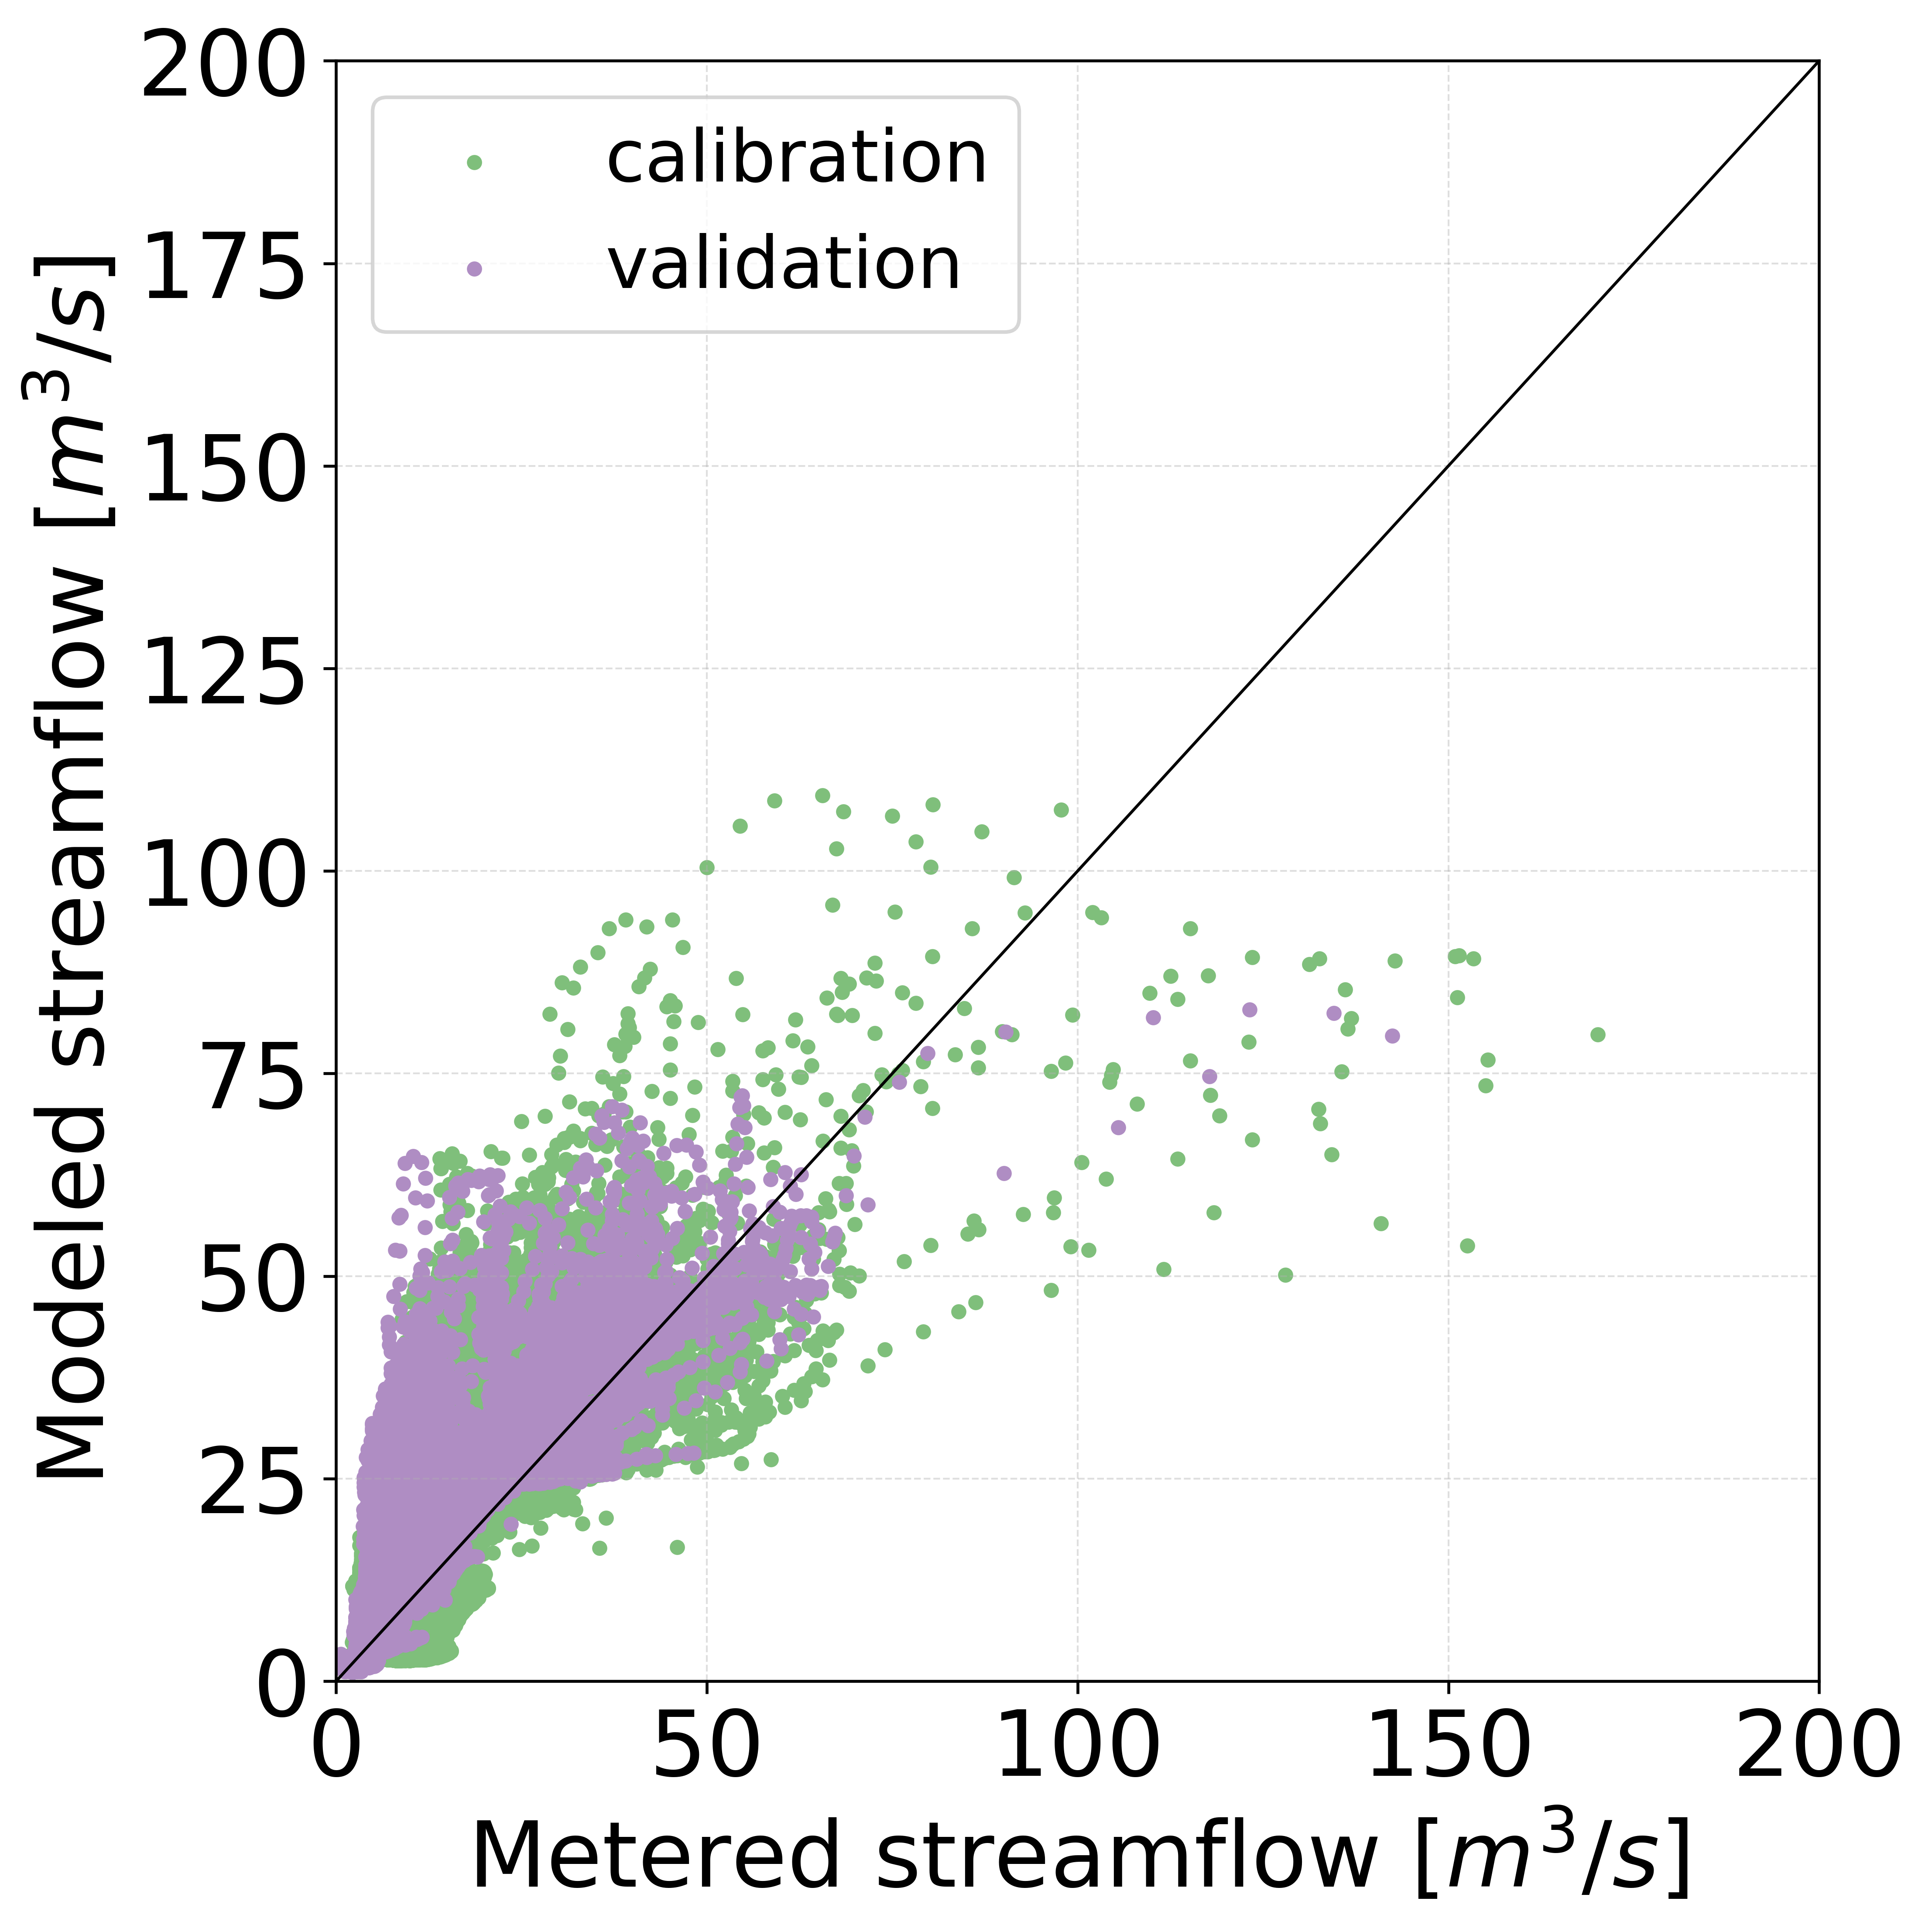

In [10]:
output_file = current.config["output_path"] + "model/streamflow/passirio/hourly/plan_plan/" + "model_streamflow_passirio_plan_hourly_qq_REA11x8.".format(current_type=current_type) + output_format

df_data_cal = pd.concat([rea_data_calibration.model_flow,rea_data_calibration.obs_flow], axis=1)
df_data_cal.dropna(inplace=True)
df_data_val = pd.concat([rea_data_validation.model_flow,rea_data_validation.obs_flow], axis=1)
df_data_val.dropna(inplace=True)

model_data_values_cal = list(df_data_cal.iloc[:,0].values)
obs_data_values_cal = list(df_data_cal.iloc[:,1].values)

model_data_values_val = list(df_data_val.iloc[:,0].values)
obs_data_values_val = list(df_data_val.iloc[:,1].values)

##############
plot_x_inches = ratio / ratio_width * width
plot_y_inches = ratio / ratio_width * height

fig, axs = plt.subplots(1,
                        figsize=[plot_x_inches, plot_y_inches],
                        tight_layout={'pad': 0},
                        dpi=my_dpi
                        )

axs.tick_params(labelsize=tick_size/scale_factor)

axs.set_xscale(xscale)
axs.set_yscale(yscale)

axs.set_ylabel(y_label, fontsize=label_size/scale_factor)
axs.set_xlabel(x_label, fontsize=label_size/scale_factor)
####################

axs.scatter( obs_data_values_cal, model_data_values_cal, s=10, c='#7fbf7b')
axs.scatter( obs_data_values_val, model_data_values_val, s=10, c='#af8dc3')

axs.set_xlim([0,200])
axs.set_ylim([0,200])

axs.legend(["calibration","validation"],fontsize=legend_fontsize/scale_factor, bbox_to_anchor=None, loc='upper left')

axs.axline([0,0],[1,1],c='k')

fig.savefig( 
    output_file, output_format=output_format,
    bbox_inches=bbox_inches, facecolor=facecolor, dpi=my_dpi )

/tmp/ipykernel_851503/3495289925.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "output_format" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(


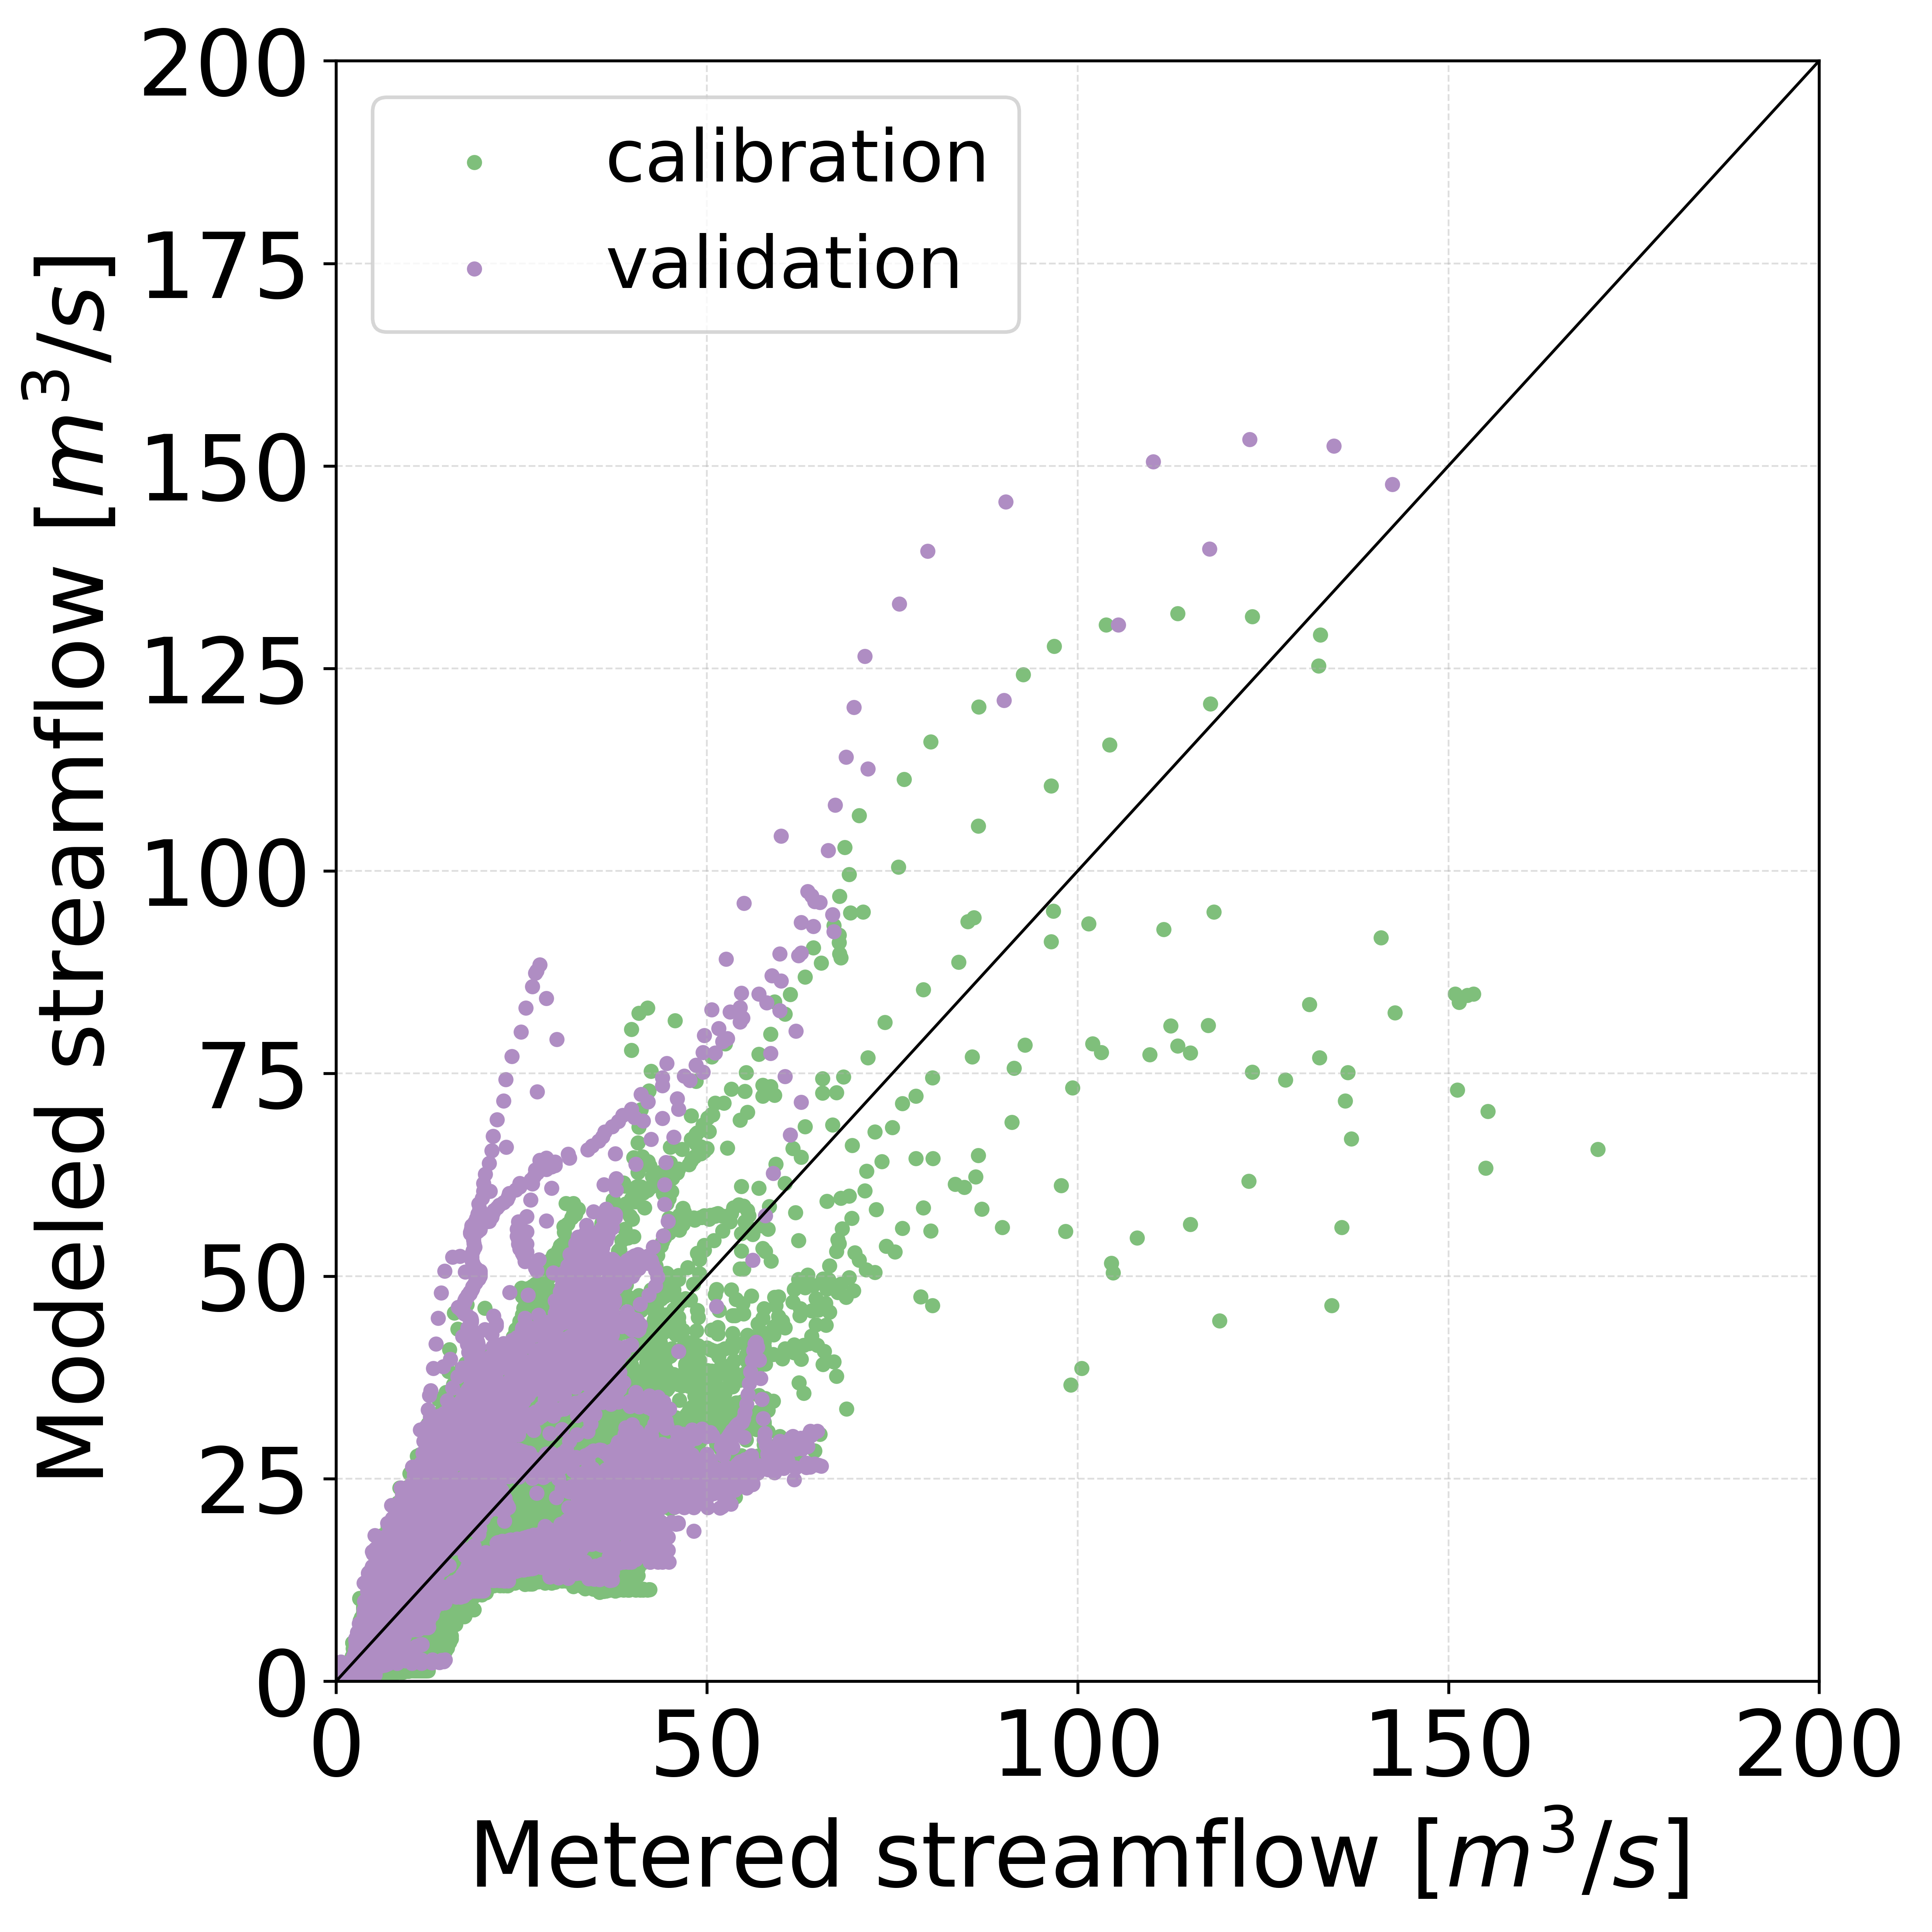

In [11]:
output_file = current.config["output_path"] + "model/streamflow/passirio/hourly/plan_plan/" + "model_streamflow_passirio_plan_hourly_qq_KR11x8.".format(current_type=current_type) + output_format

df_data_cal = pd.concat([kriging_11_data_calibration.model_flow,rea_data_calibration.obs_flow], axis=1)
df_data_cal.dropna(inplace=True)
df_data_val = pd.concat([kriging_11_data_validation.model_flow,rea_data_validation.obs_flow], axis=1)
df_data_val.dropna(inplace=True)

model_data_values_cal = list(df_data_cal.iloc[:,0].values)
obs_data_values_cal = list(df_data_cal.iloc[:,1].values)

model_data_values_val = list(df_data_val.iloc[:,0].values)
obs_data_values_val = list(df_data_val.iloc[:,1].values)

##############
plot_x_inches = ratio / ratio_width * width
plot_y_inches = ratio / ratio_width * height

fig, axs = plt.subplots(1,
                        figsize=[plot_x_inches, plot_y_inches],
                        tight_layout={'pad': 0},
                        dpi=my_dpi
                        )

axs.tick_params(labelsize=tick_size/scale_factor)

axs.set_xscale(xscale)
axs.set_yscale(yscale)

axs.set_ylabel(y_label, fontsize=label_size/scale_factor)
axs.set_xlabel(x_label, fontsize=label_size/scale_factor)
####################

axs.scatter( obs_data_values_cal, model_data_values_cal, s=10, c='#7fbf7b')
axs.scatter( obs_data_values_val, model_data_values_val, s=10, c='#af8dc3')

axs.set_xlim([0,200])
axs.set_ylim([0,200])

axs.legend(["calibration","validation"],fontsize=legend_fontsize/scale_factor, bbox_to_anchor=None, loc='upper left')

axs.axline([0,0],[1,1],c='k')

fig.savefig( 
    output_file, output_format=output_format,
    bbox_inches=bbox_inches, facecolor=facecolor, dpi=my_dpi )